<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>
<center><img src='https://upload.wikimedia.org/wikipedia/commons/a/a4/Logo-essec.jpg' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Bachelor AIDAMS</center>
<center>Regression</center>
    <center> Lab 3 : Bike Rental prediction </center>
<hr style=" border:none; height:3px;">
</h1>


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


### Business Goal:
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Loading the Dataset `day.csv`, checking it's contents and checking the data quality

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking it's Shape

df.shape

(730, 16)

In [4]:
# Checking if instant column has unique entries, if yes, then will convert it to index

df['instant'].is_unique
df.set_index('instant', inplace = True)

In [5]:
# Setting the instant column as index to number of columns
print('Number of columns after setting instant as index:', df.shape[1])

Number of columns after setting instant as index: 15


Since the Model is to be built for <b>cnt</b> column, <b>casual</b> and <b>registed</b> are redundant here. It should not be used to build the model, thus dropping these two columns before further processing.

In [6]:
# dropping unnecessary columns

casual = df.pop('casual')
registered = df.pop('registered')

In [7]:
# Checking Columns Data Types

df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [8]:
# Converting the dteday to Date Time
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['dteday'].head()

instant
1   2018-01-01
2   2018-01-02
3   2018-01-03
4   2018-01-04
5   2018-01-05
Name: dteday, dtype: datetime64[ns]

In [9]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [10]:
# Since season, weekday and weathesit are basically categorical values, converting them to string type for future use

df['season']=df['season'].astype('str')
df['weekday']=df['weekday'].astype('str')
df['weathersit']=df['weathersit'].astype('str')
df.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 79.8+ KB


In [12]:
# Checking the % of null values in each column

df.isnull().mean()*100


dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [13]:
# Checking the range of values, for example temperature, humidity etc
range_df = pd.DataFrame(columns=['temp', 'hum', 'windspeed', 'atemp'])
range_df.loc[0] = [df['temp'].min(), df['hum'].min(), df['windspeed'].min(), df['atemp'].min()]
range_df.loc[1] = [df['temp'].max(), df['hum'].max(), df['windspeed'].max(), df['atemp'].max()]
range_df.index = ['Min', 'Max']
range_df    


,temp,hum,windspeed,atemp
Min,2.424346,0.00,1.500244,3.95348
Max,35.328347,97.25,34.000021,42.04480


In [14]:
# Converting the weather variable into more understanable text

def weather_desc(x):
    if x == '1':
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif x == '2':
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif x == '3':
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    
df['weathersit_desc'] = df['weathersit'].apply(weather_desc)
df[['weathersit', 'weathersit_desc']].drop_duplicates()
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_desc
instant,,,,,,,,,,,,,,
1,2018-01-01,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,2018-01-02,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
3,2018-01-03,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,2018-01-04,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy"
5,2018-01-05,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [15]:
# Converting the seasons into specific season names for better understanding
def season_name(x):
    if x == '1':
        return 'Spring'
    elif x == '2':
        return 'Summer'
    elif x == '3':
        return 'Fall'
    else:
        return 'Winter'

df['season_name']=df['season'].apply(season_name)
df.head(100)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_desc,season_name
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring
2,2018-01-02,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring
3,2018-01-03,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
4,2018-01-04,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
5,2018-01-05,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2018-04-06,2,0,Apr,0,3,1,1,16.024153,19.38040,47.0833,17.625221,2808,"Clear, Few clouds, Partly cloudy, Partly cloudy",Summer
97,2018-04-07,2,0,Apr,0,4,1,1,17.937500,21.68480,60.2917,10.874904,3141,"Clear, Few clouds, Partly cloudy, Partly cloudy",Summer
98,2018-04-08,2,0,Apr,0,5,1,2,13.769153,16.22395,83.6250,15.208464,1471,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Summer


### Visualizing the data

In [16]:
# Checking linear relationship between the cnt variable and other numeric variables

numeric_features=df.select_dtypes(include=['int64','float64'])
numeric_features.corr()['cnt'].sort_values(ascending=False)


cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
Name: cnt, dtype: float64

We should see that there is some corelation between Feeling Temperature and sales. Also the count in 2019 are much higher than the count in 2018 for all circumstances.

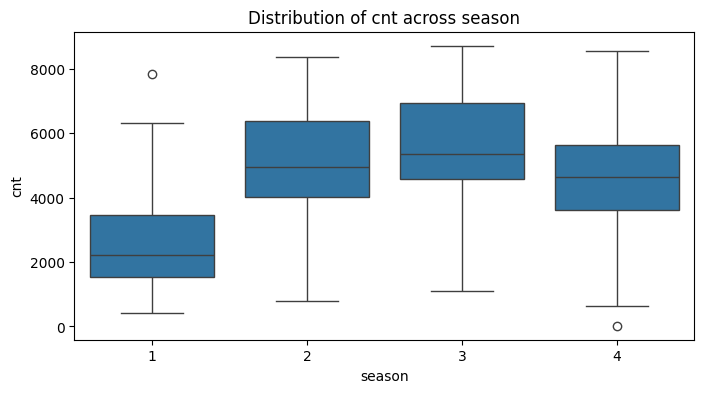

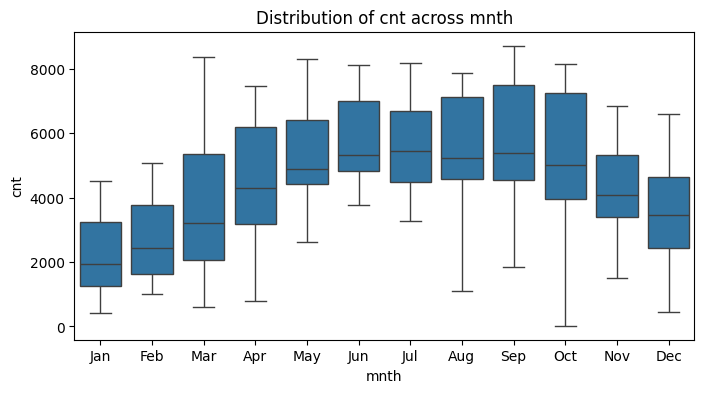

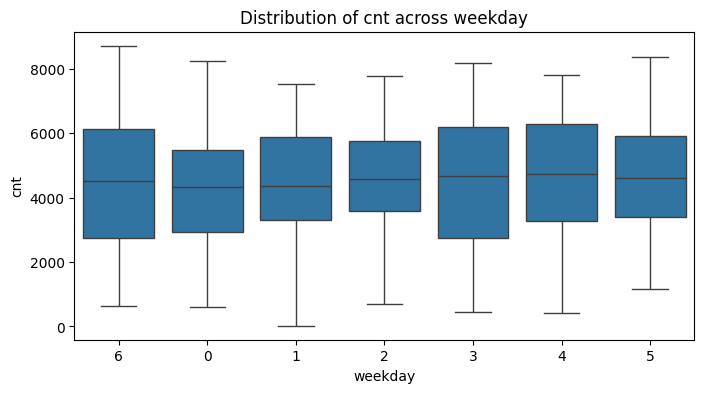

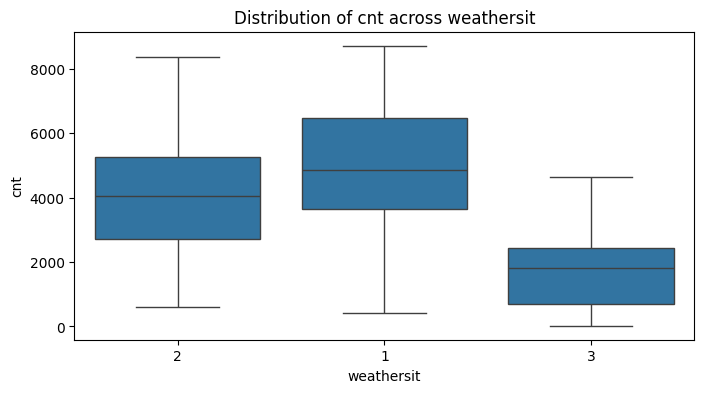

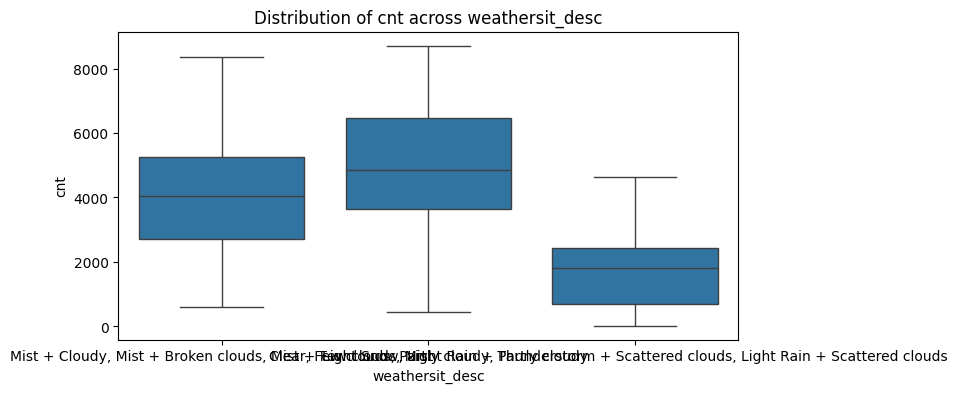

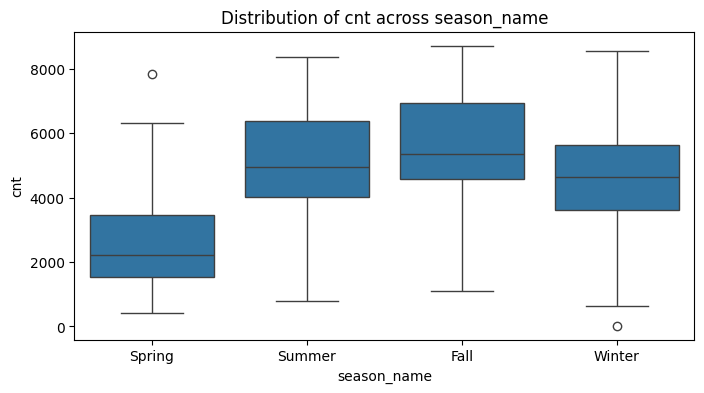

In [17]:
# Checking the distribution of rentals across different categorical variables

categorical_features=df.select_dtypes(include=['object'])
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'Distribution of cnt across {col}')
    plt.show()
    

What do you observe ? 

Bike rentals peak in summer and fall, drop sharply in winter.
Weather is a major factor, clear days drive more rentals.
Weekdays have little influence on counts
The monthly trend closely mirrors the seasonal cycle

Count picks up in Good Weather days

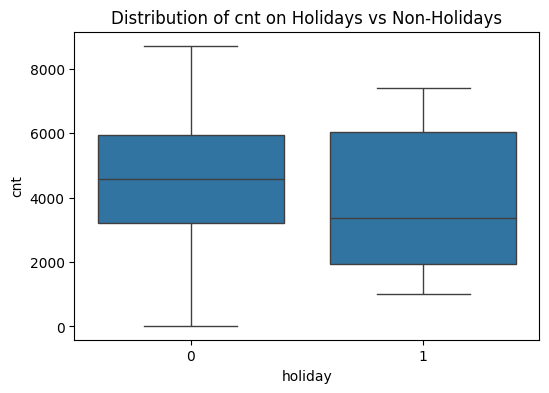

In [18]:
# Checking business on Holidays

plt.figure(figsize=(6,4))
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Distribution of cnt on Holidays vs Non-Holidays')
plt.show()

What do you observe ?

Bike demand is stronger on non-holidays, likely driven by patterns of the day rather than leisure activities

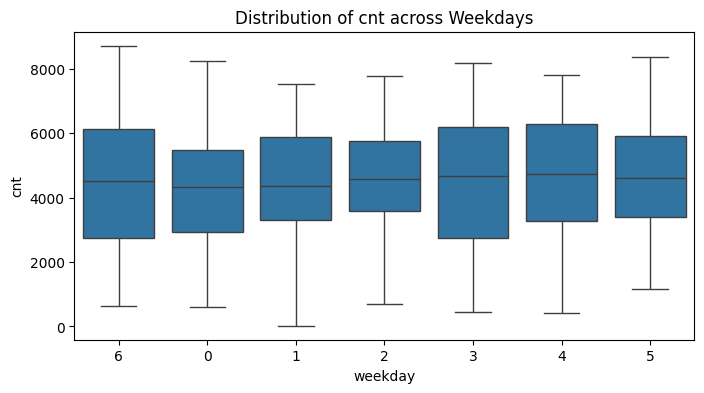

In [19]:
# Total rentals on different days of the week.

plt.figure(figsize=(8,4))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribution of cnt across Weekdays')
plt.show()

What do you observe ?

Bike rentals remain constant across all weekdays, there is no specifical effect on a specific day of the week.

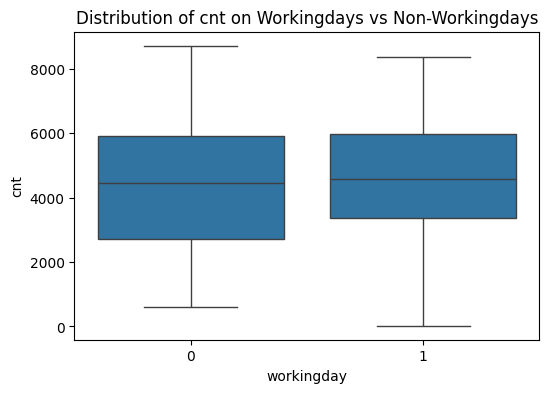

In [20]:
# Checking business on Workingdays

plt.figure(figsize=(6,4))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Distribution of cnt on Workingdays vs Non-Workingdays')
plt.show()

### Creating Dummy Variables for Categorical Data
#### We need to create dummy variables for the following columns.
- season
- mnth
- weekday
- weathersit

In [21]:
dummy = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_2,season_3,season_4,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [22]:
df = pd.concat([df,dummy], axis=1)   #Axis=1 is for horizontal stacking
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_desc,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",...,False,False,False,False,False,False,False,True,True,False
2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",...,False,False,False,False,False,False,False,False,True,False
3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,False,False,True,False,False,False,False,False,False,False
4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,False,False,False,True,False,False,False,False,False,False
5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,False,False,False,False,True,False,False,False,False,False


In [23]:
print('Shape of the new dataframe is:' , df.shape)

Shape of the new dataframe is: (730, 33)


In [24]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it

df = df.drop('dteday', axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_desc,season_name,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,...,False,False,False,False,False,False,False,True,True,False
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,...,False,False,False,False,False,False,False,False,True,False
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,...,False,False,False,True,False,False,False,False,False,False
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,...,False,False,False,False,True,False,False,False,False,False


In [25]:
# Moving the cnt to the end for easier identification

cnt=df.pop('cnt')
df['cnt']=cnt
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_desc,season_name,season_2,...,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,cnt
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,...,False,False,False,False,False,False,True,True,False,985
2,0,0,0,14.902598,17.68695,69.6087,16.652113,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,...,False,False,False,False,False,False,False,True,False,801
3,0,0,1,8.050924,9.47025,43.7273,16.636703,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,...,False,True,False,False,False,False,False,False,False,1349
4,0,0,1,8.200000,10.60610,59.0435,10.739832,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,...,False,False,True,False,False,False,False,False,False,1562
5,0,0,1,9.305237,11.46350,43.6957,12.522300,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,...,False,False,False,True,False,False,False,False,False,1600


### Splitting the data into Train and Test Dataset

In [26]:
# print the shape of the train and test data
X = df.drop('cnt', axis=1)
y = df['cnt']
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (730, 31)
Shape of y: (730,)


In [27]:
# Checking the Train Data

X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_desc,season_name,season_2,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,...,False,False,False,False,False,False,False,True,True,False
2,0,0,0,14.902598,17.68695,69.6087,16.652113,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Spring,False,...,False,False,False,False,False,False,False,False,True,False
3,0,0,1,8.050924,9.47025,43.7273,16.636703,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,8.200000,10.60610,59.0435,10.739832,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,...,False,False,False,True,False,False,False,False,False,False
5,0,0,1,9.305237,11.46350,43.6957,12.522300,"Clear, Few clouds, Partly cloudy, Partly cloudy",Spring,False,...,False,False,False,False,True,False,False,False,False,False


Other than the numeric fields, all other categorical values have been encoded. Now we can go ahead and scale the data.

### Feature Scaling

In [28]:
# Do a MinMax scaling (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# Keep only numeric columns for scaling (strings like weather descriptions will cause errors)
numeric_cols = X.select_dtypes(include=[np.number]).columns
non_numeric_cols = X.columns.difference(numeric_cols)

scaler = MinMaxScaler()
X_scaled_numeric = pd.DataFrame(scaler.fit_transform(X[numeric_cols]),
                                columns=numeric_cols,
                                index=X.index)

# If there are non-numeric columns, keep them as-is and concatenate back so the dataframe structure is preserved
if len(non_numeric_cols) > 0:
    X_scaled = pd.concat([X[non_numeric_cols].reset_index(drop=True),
                          X_scaled_numeric.reset_index(drop=True)],
                         axis=1)
else:
    X_scaled = X_scaled_numeric

X_scaled.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weekday_4,weekday_5,weekday_6,yr,holiday,workingday,temp,atemp,hum,windspeed
0,False,False,False,True,False,False,False,False,False,False,...,False,False,True,0.0,0.0,0.0,0.355170,0.373517,0.828620,0.284606
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0.0,0.0,0.0,0.379232,0.360541,0.715771,0.466215
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0.0,0.0,1.0,0.171000,0.144830,0.449638,0.465740
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0.0,0.0,1.0,0.175530,0.174649,0.607131,0.284297
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,0.0,0.0,1.0,0.209120,0.197158,0.449313,0.339143


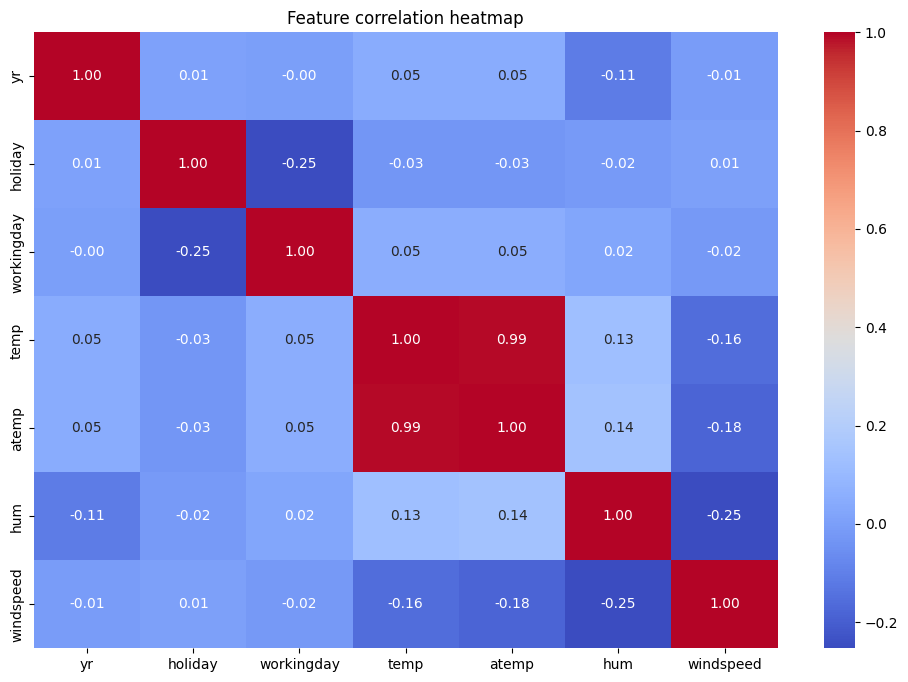

In [29]:
# Checking the Heatmap
plt.figure(figsize=(12,8))
# Use only numeric columns to compute correlations to avoid conversion errors
numeric_for_corr = X_scaled.select_dtypes(include=[np.number])
sns.heatmap(numeric_for_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature correlation heatmap')
plt.show()

What do you observe in terms of colinerity with <b>cnt</b> and between the different features ? 

temp and atemp are highly collinear

Other features show low correlation, low risk of multicolinearity

The rest of the dataset is well-behaving

### Building the Model
Since the number of columns is 29, which is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.<br>
We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF.

<b>There wil be several iterations before getting the perfect model</b>

In [30]:

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Applying OLS model
y_train = df_train.pop('cnt')
X_train = df_train.copy()

# Convert boolean columns to integers
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)

# Drop non-numeric columns (object type)
X_train = X_train.select_dtypes(include=[np.number])

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     96.02
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.78e-177
Time:                        11:33:11   Log-Likelihood:                -4111.4
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     482   BIC:                             8404.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1247.8951    423.981      2.943      0.003     414.816    2080.975
yr            1953.1941     70.852     27.567      0.000    1813.977    2092.411
holiday       -301.9160    200.164     -1.508      0.132    -695.217      91.385
workingday     319.7814     80.428      3.976      0.000     161.749     477.814
temp            49.8430     67.981      0.733      0.464     -83.733     183.419
atemp           57.2838     60.233      0.951      0.342     -61.068     175.635
hum            -14.1556      3.527     -4.014      0.000     -21.085      -7.226
windspeed      -35.1887      8.153     -4.316      0.000     -51.208     -19.170
season_2      1312.9383    241.428      5.438      0.000     838.557    1787.319
season_3      1218.9155    270.052      4.514      0.000     688.291    1749.540
season_4      1855.3484    229.582      8.081      0.000    1404.243    2306.454
mnth_Aug       -67.3818    301.051     -0.224      0.823    -658.915     524.152
mnth_Dec      -296.9277    301.520     -0.985      0.325    -889.384     295.529
mnth_Feb       160.0487    305.891      0.523      0.601    -440.996     761.094
mnth_Jan        35.8592    311.295      0.115      0.908    -575.804     647.522
mnth_Jul      -335.6411    302.347     -1.110      0.268    -929.722     258.440
mnth_Jun        23.0740    217.454      0.106      0.916    -404.202     450.350
mnth_Mar       481.9910    239.490      2.013      0.045      11.417     952.565
mnth_May       274.2786    178.039      1.541      0.124     -75.550     624.107
mnth_Nov      -402.9690    319.372     -1.262      0.208   -1030.503     224.565
mnth_Oct       335.2482    313.893      1.068      0.286    -281.519     952.015
mnth_Sep       639.8977    277.426      2.307      0.022      94.785    1185.011
weekday_1      -53.0812     85.732     -0.619      0.536    -221.535     115.373
weekday_2     -120.6694     96.828     -1.246      0.213    -310.927      69.588
weekday_3       29.0869     96.494      0.301      0.763    -160.515     218.689
weekday_4       52.8505     93.587      0.565      0.573    -131.039     236.739
weekday_5      109.6787     96.661      1.135      0.257     -80.250     299.608
weekday_6      390.7589    126.245      3.095      0.002     142.701     638.817
weathersit_2  -483.9089     92.287     -5.244      0.000    -665.243    -302.575
weathersit_3 -1874.0159    237.366     -7.895      0.000   -2340.416   -1407.615
==============================================================================
Omnibus:                       84.697   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.335
Skew:                          -0.860   Prob(JB):                     3.15e-44
Kurtosis:                       5.539   Cond. No.                     1.02e+16
===============

In [31]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_4,inf
1,holiday,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
25,weekday_5,inf
21,weekday_1,inf
4,atemp,1857.44
3,temp,1818.87
5,hum,37.88


Are there insignificant variables and variables with strong multicollinearity ? If yes, you need to get rid of them.

In the following cells, you will follow the same process in an iterative manner till you build a robust model. First you will remove all columns with High P Values and then when the P Values are acceptable for all the columns, you will check their VIF and remove them.

In [32]:
# Removing 'mnth_Mar' due to high P-Value and appling OLS again
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.80
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          1.31e-177
Time:                        11:33:17   Log-Likelihood:                -4113.5
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     483   BIC:                             8402.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1729.8020    350.995      4.928      0.000    1040.136    2419.468
yr            1961.0191     70.968     27.632      0.000    1821.574    2100.464
holiday       -302.9546    200.794     -1.509      0.132    -697.492      91.583
workingday     328.2073     80.572      4.073      0.000     169.892     486.523
temp            46.8356     68.179      0.687      0.492     -87.128     180.799
atemp           57.3890     60.423      0.950      0.343     -61.335     176.113
hum            -14.0196      3.537     -3.963      0.000     -20.970      -7.069
windspeed      -36.8002      8.139     -4.522      0.000     -52.792     -20.808
season_2      1008.7131    188.842      5.342      0.000     637.661    1379.766
season_3      1016.6883    251.452      4.043      0.000     522.612    1510.764
season_4      1750.8401    224.338      7.804      0.000    1310.042    2191.638
mnth_Aug      -266.0182    285.309     -0.932      0.352    -826.618     294.581
mnth_Dec      -681.0239    234.170     -2.908      0.004   -1141.141    -220.907
mnth_Feb      -283.2302    212.936     -1.330      0.184    -701.625     135.165
mnth_Jan      -414.3503    217.162     -1.908      0.057    -841.050      12.349
mnth_Jul      -528.9227    287.593     -1.839      0.067   -1094.011      36.165
mnth_Jun      -105.2522    208.552     -0.505      0.614    -515.032     304.528
mnth_May       164.6027    170.028      0.968      0.333    -169.483     498.689
mnth_Nov      -737.0854    273.693     -2.693      0.007   -1274.862    -199.309
mnth_Oct        12.5716    270.708      0.046      0.963    -519.339     544.482
mnth_Sep       403.7081    252.173      1.601      0.110     -91.784     899.200
weekday_1      -65.2704     85.787     -0.761      0.447    -233.833     103.292
weekday_2     -115.2908     97.096     -1.187      0.236    -306.074      75.493
weekday_3       32.8884     96.780      0.340      0.734    -157.274     223.050
weekday_4       58.9729     93.833      0.628      0.530    -125.397     243.343
weekday_5      113.9527     96.942      1.175      0.240     -76.528     304.434
weekday_6      390.6794    126.643      3.085      0.002     141.840     639.518
weathersit_2  -480.2643     92.560     -5.189      0.000    -662.134    -298.395
weathersit_3 -1858.5508    237.990     -7.809      0.000   -2326.174   -1390.928
==============================================================================
Omnibus:                       83.051   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.400
Skew:                          -0.838   Prob(JB):                     3.05e-44
Kurtosis:                       5.570   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] Stand

In [ ]:
# Removing 'weekday_4' due to high P-Value and appling OLS again



In [ ]:
# Removing 'mnth_Oct' due to high P-Value and appling OLS again


In [ ]:
# Removing 'mnth_Jun' due to high P-Value and appling OLS again


In [ ]:
# Removing 'weekday_3' due to high P-Value and appling OLS again


In [ ]:
# Removing 'atemp' due to high P-Value


In [ ]:
# Removing 'weekday_5' due to high P-Value


In [ ]:
# Removing 'mnth_Aug' due to high P-Value


In [ ]:
# Removing 'weekday_2' due to high P-Value


In [ ]:
# Removing 'weekday_1' due to high P-Value


In [ ]:
# Removing 'mnth_May' due to high P-Value


In [ ]:
# Removing 'mnth_Feb' due to high P-Value


We now see that all the variables have a P Value <= 0.05, which signifies that these variables are statistically significant. Let's now check if there is any Multi-Colinearity among these variables.

In [ ]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs


What do you observe ?

In [ ]:
# Removing 'hum' due to high VIF


In [ ]:
#Checking the VIF Again


Does it looks like an acceptable model ? 

In [ ]:
# Checking the co-efficients of the final model 


### Validating the assumptions of Linear Regression
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

In [ ]:
# Validating Linear Relationship


The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

In [ ]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable


As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

In [ ]:
# Validating Multi Colinearity


All variables have less than 0.56 correlation with eachother. Checking the VIF now.

Taking 10 as the maximum VIF permissible for this model, we decide on keeping these colmns based upon business assumptions.

In [ ]:
# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)


There is almost nill auto-correlation

In [ ]:
# Normality of Errors


# Ploting the histogram of the error terms


The error terms are normally distributed

### Making prediction using the final model

In [ ]:
# Scaling the Test Dataset with the Scaler of the Training Set


In [ ]:
# Dividing into X_test and y_test


In [ ]:
# Adding the constant column

# Removing all the columns which has been removed from the last model


In [ ]:
# Making prediction using the last Model 14


### Model Evaluation

In [ ]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

In [ ]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

Write the equation of your best fitted line developed by your last model : 



Write your recommandation to the bike sharing company.